In [1]:
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("CSV Combination Example") \
    .getOrCreate()

df1 = spark.read.csv("/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/combined_assist_and_turnover_ratio.csv", header=True, inferSchema=False)
df2 = spark.read.csv("/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/combined_data_TPA.csv", header=True, inferSchema=False)
df3= spark.read.csv("/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/combined_data_TPP.csv", header=True, inferSchema=False)
df4= spark.read.csv("/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/combined_scoring_assist.csv", header=True, inferSchema=False)
df5= spark.read.csv("/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/Rebounds.csv", header=True, inferSchema=False)
df6= spark.read.csv("/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/FGP 2000-2024.csv", header=True, inferSchema=False)
df7= spark.read.csv("/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/FTP 2000-2024.csv", header=True, inferSchema=False)

# Combine DataFrames based on "Team" and "Years" columns
combined_df = df1.join(df2, ["Team", "Years"], "inner") \
                 .join(df3, ["Team", "Years"], "inner") \
                 .join(df4, ["Team", "Years"], "inner") \
                 .join(df5, ["Team", "Years"], "inner") \
                 .join(df6, ["Team", "Years"], "inner") \
                 .join(df7, ["Team", "Years"], "inner")

# Visualization
combined_df.show()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/08 21:14:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/04/08 21:14:55 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
24/04/08 21:14:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Rank, Team, GM, W-L, FT, FTA, FT%, Years
 Schema: _c0, Rank, Team, GM, W-L, FT, FTA, FT%, Years
Expected: _c0 but found: 
CSV file: file:///Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/FTP%202000-2024.csv
24/04/08 21:14:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Rank, Team, GM, W-L, FGM, FGA, FG%, Years
 Schema: _c0, Rank, Team, GM, W-L, FGM, FGA, FG%, Years
Expected: _c0 but found: 


+--------------------+-----+----+----+---+-----+---+---+-----+------------------+----+---+----+---+----+----+----+---+-----+---+----+----+----+----+---+-----+-----+----+----+---+-----+-----+-----+---+----+----+---+-----+-----+-----+----+----+----+---+-----+---+---+----+
|                Team|Years| _c0|Rank| GM|  W-L|AST| TO|Ratio|               TPG|Rank| GM| W-L|3FG|3FGA| Avg|Rank| GM|  W-L|3FG|3FGA|3FG%| _c0|Rank| GM|  W-L|  PTS| PPG|Rank| GM|ORebs|DRebs|  REB|RPG| _c0|Rank| GM|  W-L|  FGM|  FGA| FG%| _c0|Rank| GM|  W-L| FT|FTA| FT%|
+--------------------+-----+----+----+---+-----+---+---+-----+------------------+----+---+----+---+----+----+----+---+-----+---+----+----+----+----+---+-----+-----+----+----+---+-----+-----+-----+---+----+----+---+-----+-----+-----+----+----+----+---+-----+---+---+----+
|  Michigan (Big Ten)| 1213|1665|   1| 39| 31-8|565|368| 1.54| 9.435897435897436|  18| 39|NULL|296| 769|NULL|  18| 39| 31-8|296| 769|38.5|3638|  25| 39| 31-8|2,932|75.2|  18| 39|    0|   

24/04/08 21:14:58 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Rank, Team, GM, W-L, AST, TO, Ratio, Years, TPG
 Schema: _c0, Rank, Team, GM, W-L, AST, TO, Ratio, Years, TPG
Expected: _c0 but found: 
CSV file: file:///Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/combined_assist_and_turnover_ratio.csv


In [2]:
# Get list of column names
columns = combined_df.columns

# Remove duplicate columns
columns_to_drop = set()
for col in columns:
    if columns.count(col) > 1:
        columns_to_drop.add(col)

# Drop duplicate columns
combined_df = combined_df.drop(*columns_to_drop)

# Show the DataFrame after removing duplicate columns
combined_df.show()

+--------------------+-----+---+---+-----+------------------+----+----+-----+----+-----+-----+-----+---+-----+-----+----+---+---+----+
|                Team|Years|AST| TO|Ratio|               TPG| Avg|3FG%|  PTS| PPG|ORebs|DRebs|  REB|RPG|  FGM|  FGA| FG%| FT|FTA| FT%|
+--------------------+-----+---+---+-----+------------------+----+----+-----+----+-----+-----+-----+---+-----+-----+----+---+---+----+
|  Michigan (Big Ten)| 1213|565|368| 1.54| 9.435897435897436|NULL|38.5|2,932|75.2|    0|    0|1,366|  0|1,093|2,260|48.4|450|642|70.1|
|UC Irvine (Big West)| 1213|580|461| 1.26| 12.45945945945946|NULL|33.4|2,558|69.1|    0|    0|1,428|  0|  932|2,151|43.3|445|669|66.5|
|   Iowa St. (Big 12)| 1213|560|460| 1.22|13.142857142857142|NULL|37.4|2,779|79.4|    0|    0|1,341|  0|  962|2,111|45.6|509|696|73.1|
|   Santa Clara (WCC)| 1213|560|468|  1.2| 12.31578947368421|NULL|36.1|2,827|74.4|    0|    0|1,315|  0|  970|2,195|44.2|584|803|72.7|
|   Wichita St. (MVC)| 1213|530|492| 1.08|12.6153846153

In [3]:
# Initialize SparkSession
spark = SparkSession.builder \
    .appName("Updated Winners DataFrame") \
    .getOrCreate()

# Define the data for the updated winners_df DataFrame
data = [
    (2223, "UConn (AAC)"),
    (2122, "Kansas (Big 12)"),
    (2021, "Baylor (Big 12)"),
    (1920, "Canceled"),
    (1819, "Virginia (ACC)"),
    (1718, "Villanova (Big East)"),
    (1617, "North Carolina (ACC)"),
    (1516, "Villanova (Big East)"),
    (1415, "Duke (ACC)"),
    (1314, "UConn (AAC)"),
    (1213, "Louisville (ACC)")
]

# Create the DataFrame
winners_df = spark.createDataFrame(data, ["Years", "Champion"])

# Show the updated DataFrame
winners_df.show()

24/04/08 21:15:07 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


+-----+--------------------+
|Years|            Champion|
+-----+--------------------+
| 2223|         UConn (AAC)|
| 2122|     Kansas (Big 12)|
| 2021|     Baylor (Big 12)|
| 1920|            Canceled|
| 1819|      Virginia (ACC)|
| 1718|Villanova (Big East)|
| 1617|North Carolina (ACC)|
| 1516|Villanova (Big East)|
| 1415|          Duke (ACC)|
| 1314|         UConn (AAC)|
| 1213|    Louisville (ACC)|
+-----+--------------------+



In [4]:
from pyspark.sql.functions import when

# Join tournament winners data with combined_df based on 'Years'
combined_df = combined_df.join(winners_df, 'Years', 'left_outer')

# Add a new column indicating whether a team won the tournament (1 for winner, 0 for others)
combined_df = combined_df.withColumn('Tournament_Winner', when(combined_df['Team'] == combined_df['Champion'], 1).otherwise(0))

# Show the updated DataFrame
combined_df.show()

+-----+--------------------+---+---+-----+------------------+----+----+-----+----+-----+-----+-----+---+-----+-----+----+---+---+----+----------------+-----------------+
|Years|                Team|AST| TO|Ratio|               TPG| Avg|3FG%|  PTS| PPG|ORebs|DRebs|  REB|RPG|  FGM|  FGA| FG%| FT|FTA| FT%|        Champion|Tournament_Winner|
+-----+--------------------+---+---+-----+------------------+----+----+-----+----+-----+-----+-----+---+-----+-----+----+---+---+----+----------------+-----------------+
| 1213|  Michigan (Big Ten)|565|368| 1.54| 9.435897435897436|NULL|38.5|2,932|75.2|    0|    0|1,366|  0|1,093|2,260|48.4|450|642|70.1|Louisville (ACC)|                0|
| 1213|UC Irvine (Big West)|580|461| 1.26| 12.45945945945946|NULL|33.4|2,558|69.1|    0|    0|1,428|  0|  932|2,151|43.3|445|669|66.5|Louisville (ACC)|                0|
| 1213|   Iowa St. (Big 12)|560|460| 1.22|13.142857142857142|NULL|37.4|2,779|79.4|    0|    0|1,341|  0|  962|2,111|45.6|509|696|73.1|Louisville (ACC)

In [6]:
# Specify the output file path
output_path = "/Users/ryannuttall/Documents/GitHub/NCAA-March-Madness/Resources/super_data.csv"

# Write the DataFrame to a CSV file
combined_df.write.csv(output_path, header=True)

In [7]:
# Data types
column_types = combined_df.dtypes
print(column_types)

[('Years', 'string'), ('Team', 'string'), ('AST', 'string'), ('TO', 'string'), ('Ratio', 'string'), ('TPG', 'string'), ('Avg', 'string'), ('3FG%', 'string'), ('PTS', 'string'), ('PPG', 'string'), ('ORebs', 'string'), ('DRebs', 'string'), ('REB', 'string'), ('RPG', 'string'), ('FGM', 'string'), ('FGA', 'string'), ('FG%', 'string'), ('FT', 'string'), ('FTA', 'string'), ('FT%', 'string'), ('Champion', 'string'), ('Tournament_Winner', 'int')]


In [8]:
# Set feature columns
feature_cols = ['AST', 'TO', 'Ratio', 'TPG', 'Avg', '3FG%', 'PTS', 'PPG', 'ORebs', 'DRebs', 'REB', 'RPG', 'FGM', 'FGA', 'FG%', 'FT', 'FTA', 'FT%']

In [9]:
from pyspark.sql.types import IntegerType, DoubleType

# Convert string columns to numeric types
for col in feature_cols:
    combined_df = combined_df.withColumn(col, combined_df[col].cast(DoubleType()))

# Verify data types
column_types = combined_df.dtypes
print(column_types)

[('Years', 'string'), ('Team', 'string'), ('AST', 'double'), ('TO', 'double'), ('Ratio', 'double'), ('TPG', 'double'), ('Avg', 'double'), ('3FG%', 'double'), ('PTS', 'double'), ('PPG', 'double'), ('ORebs', 'double'), ('DRebs', 'double'), ('REB', 'double'), ('RPG', 'double'), ('FGM', 'double'), ('FGA', 'double'), ('FG%', 'double'), ('FT', 'double'), ('FTA', 'double'), ('FT%', 'double'), ('Champion', 'string'), ('Tournament_Winner', 'int')]


In [10]:
from pyspark.sql.functions import col

# Check for null values in all columns
for col_name in combined_df.columns:
    null_count = combined_df.filter(col(col_name).isNull()).count()
    print(f"Number of null values in column '{col_name}': {null_count}")

Number of null values in column 'Years': 0
Number of null values in column 'Team': 0
Number of null values in column 'AST': 0
Number of null values in column 'TO': 0
Number of null values in column 'Ratio': 0
Number of null values in column 'TPG': 0
Number of null values in column 'Avg': 3025
Number of null values in column '3FG%': 0
Number of null values in column 'PTS': 3706
Number of null values in column 'PPG': 0
Number of null values in column 'ORebs': 0
Number of null values in column 'DRebs': 87
Number of null values in column 'REB': 3090
Number of null values in column 'RPG': 0
Number of null values in column 'FGM': 166
Number of null values in column 'FGA': 3691
Number of null values in column 'FG%': 0
Number of null values in column 'FT': 0
Number of null values in column 'FTA': 6
Number of null values in column 'FT%': 0
Number of null values in column 'Champion': 351
Number of null values in column 'Tournament_Winner': 0


In [11]:
from pyspark.sql.functions import mean

# Set numeric_columns
numeric_cols = ['Avg', 'PTS', 'DRebs', 'REB', 'FGM', 'FGA', 'FTA']

# Calculate means of numerical columns
means = combined_df.select([mean(col).alias(col) for col in numeric_cols]).collect()[0].asDict()

# Impute null values with mean for numerical columns
imputed_df = combined_df
for col in numeric_cols:
    imputed_df = imputed_df.na.fill(means[col], [col])

# Verify the count after imputing null values
imputed_count = imputed_df.count()
print(f"Number of rows after imputing null values: {imputed_count}")

Number of rows after imputing null values: 3716


In [12]:
# Assuming your DataFrame is named 'imputed_df'
row_count = imputed_df.count()
print("Number of rows in DataFrame:", row_count)

Number of rows in DataFrame: 3716


In [13]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA

# Assemble selected features into a single vector column
vector_assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")
assembled_df = vector_assembler.transform(imputed_df)

# Apply PCA
pca = PCA(k=3, inputCol="features", outputCol="pca_features")
pca_model = pca.fit(assembled_df)

# Transform data using PCA
pca_result = pca_model.transform(assembled_df)

# Show the PCA-transformed features
pca_result.select("pca_features").show(truncate=False)

24/04/08 21:16:28 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/04/08 21:16:28 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


+------------------------------------------------------------+
|pca_features                                                |
+------------------------------------------------------------+
|[958.1562800827949,79.2813464697561,-760.6897521589547]     |
|[1049.1673903831615,44.12694825167836,-847.7214289089153]   |
|[1082.2819489394124,52.894241010827386,-867.0333846069354]  |
|[1151.91111664941,134.3718852268641,-871.5113825208814]     |
|[1135.7121097850875,131.59915486105575,-861.1955159349774]  |
|[1548.309985674706,-363.51905127616624,-223.1473084474753]  |
|[1496.6334970994637,-122.24657781900169,-197.29995298067442]|
|[1595.1092564840978,-167.28443946891537,-89.21373506858083] |
|[1543.393000326517,-252.0512339774756,-282.37923406055177]  |
|[1521.6493326023374,-212.82787065101627,-260.27299909571474]|
|[1674.247377373004,-199.58312151953828,-180.87229713896383] |
|[1547.549858060018,-199.71869617223638,-286.7840747271776]  |
|[1526.7885062175894,-299.9838581915874,-263.5796571414

In [14]:
# Explained Variance of PCA model
explained_variance_ratio = pca_model.explainedVariance
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.6971501974020737,0.17171495910799567,0.06570983268370041]


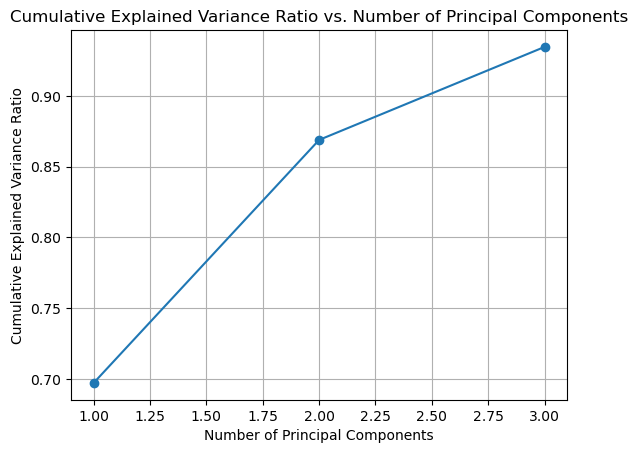

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Explained variance ratio for each principal component
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the cumulative explained variance ratio
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [16]:
# Finding loadings of PCA model
loadings = pca_model.pc.toArray()  # Extract the loadings as a NumPy array
print("Loadings of each original feature in the principal components:")
print(loadings)

Loadings of each original feature in the principal components:
[[ 9.27307358e-05 -1.70025902e-03  7.30585457e-04]
 [ 2.68450823e-03 -2.54122787e-03 -5.75086387e-03]
 [ 5.49935820e-01 -4.28493010e-01  7.12925326e-01]
 [ 1.33331771e-01 -9.96030942e-02 -2.63103260e-01]
 [ 5.55534481e-01 -4.21441573e-01 -6.49790687e-01]
 [ 6.10053825e-03 -5.35166276e-03 -1.43976059e-02]
 [ 6.09204597e-01  7.92982961e-01  6.73203346e-03]]


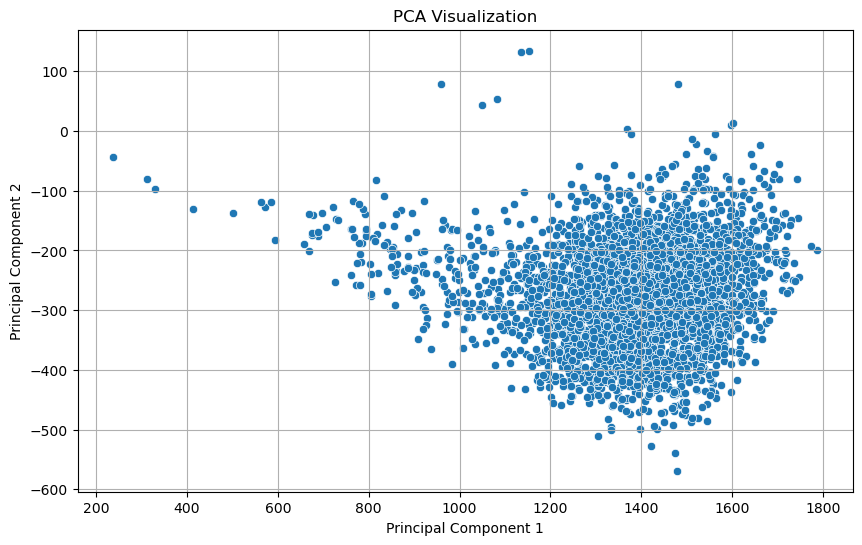

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert PCA-transformed features to Pandas DataFrame for visualization
pca_df = pca_result.select("pca_features").toPandas()

# Extract individual principal components
pca_df['Principal_Component_1'] = pca_df['pca_features'].apply(lambda x: x[0])
pca_df['Principal_Component_2'] = pca_df['pca_features'].apply(lambda x: x[1])

# Plot scatter plot of PCA-transformed features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='Principal_Component_1', y='Principal_Component_2')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()



In [18]:
# Step 3: Data Splitting (Splitting the dataset into training and testing sets)
# Split the data into training and testing sets (80% train, 20% test)
(training_data, testing_data) = pca_result.randomSplit([0.8, 0.2], seed=42)

In [19]:
# Step 4: Model Selection and Training (Using logistic regression)
# Initialize Logistic Regression model
from pyspark.ml.classification import LogisticRegression
logreg_model = LogisticRegression(featuresCol="pca_features", labelCol="Tournament_Winner")

In [20]:
# Train the model
logreg_model = logreg_model.fit(training_data)

In [21]:
# Step 5: Model Evaluation (Evaluating the logistic regression model)
# Evaluate the model on testing data
predictions = logreg_model.transform(testing_data)

In [22]:
# Evaluate model performance using BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Tournament_Winner")
auc = evaluator.evaluate(predictions)
print("Area Under ROC Curve (AUC):", auc)

Area Under ROC Curve (AUC): 0.40684133915574966
